Dataset yang tersedia:
1. iris
2. wine
3. breast cancer
Silahkan memilih dataset yang diinginkan (Contoh: 1): 1

(150, 5)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Target  
0       0  
1       0  
2       0  
3       0  
4       0  

Terdapat kolom-kolom sebagai berikut.
1. sepal length (cm)
2. sepal width (cm)
3. petal length (cm)
4. petal width (cm)
Silahkan memilih pasangan atribut yang diinginkan.
Kolom 1 (Contoh: 1): 1
Kolom 2 (Contoh: 2): 2



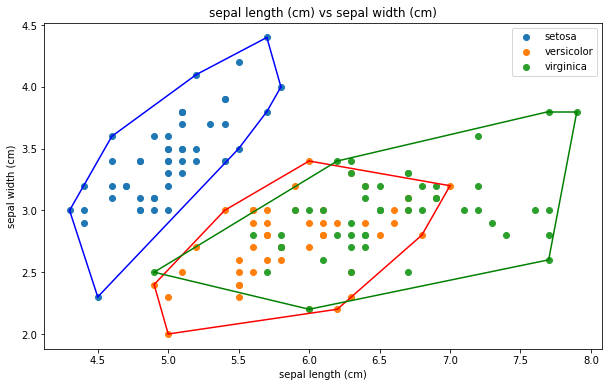

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import datasets 

print("Dataset yang tersedia:")
print("1. iris")
print("2. wine")
print("3. breast cancer")
choice = int(input("Silahkan memilih dataset yang diinginkan (Contoh: 1): "))
print()
if (choice == 1):
    data = datasets.load_iris() 
elif (choice == 2):
    data = datasets.load_wine()
elif (choice == 3):
    data = datasets.load_breast_cancer()
else:
    print("Maaf, pilihan dataset Anda tidak valid.")

if (choice == 1 or choice == 2 or choice == 3):
    #create a DataFrame 
    df = pd.DataFrame(data.data, columns=data.feature_names) 
    df['Target'] = pd.DataFrame(data.target) 
    print(df.shape)
    print(df.head())
    
    #memilih pasangan atribut
    print()
    print("Terdapat kolom-kolom sebagai berikut.")
    for i in range(len(df.columns)-1):
        print(str(i+1) + ". " + df.columns[i])
    print("Silahkan memilih pasangan atribut yang diinginkan.")
    a = int(input("Kolom 1 (Contoh: 1): "))
    b = int(input("Kolom 2 (Contoh: 2): "))
    a -= 1
    b -= 1
    print()

    #visualisasi hasil ConvexHull dengan library implementasi ConvexHull Divide & Conquer
    if (a != b and a >= 0 and a < len(df.columns)-1 and b > 0 and b < len(df.columns)-1):
        import myConvexHull
        plt.figure(figsize = (10, 6))
        colors = ['b','r','g']
        title = data.feature_names[a] + " vs " + data.feature_names[b]
        plt.title(title)
        plt.xlabel(data.feature_names[a])
        plt.ylabel(data.feature_names[b])
        for i in range(len(data.target_names)):
            bucket = df[df['Target'] == i]
            bucket = bucket.iloc[:,[a,b]].values
            hull = myConvexHull.ConvexHull(bucket)
            plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
            for simplex in hull.simplices:
                plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
        plt.legend()
    else:
        print("Maaf, pilihan pasangan atribut Anda tidak valid.")